## Lab 3
Hubery Hu

In [89]:
import numpy as np;
import networkx
import pandas as pd;
import matplotlib.pyplot as plt

1. Calculate, plot and describe the out-strength (weighted out-degree) distribution of the word association dataset

Read from the txt and create a weighted graph.

In [90]:
graph = networkx.read_edgelist('word_association_graph_DSF.txt', 
                               create_using=networkx.DiGraph(),
                               nodetype=str, data=[('weight', float)],
                              )

Use a dictionary to store all out degree weights.

In [91]:
out_degree_weights = {}

# Initialize the out_degree_weights dictionary
for node in graph.nodes():
    out_degree_weights[node] = 0

for coming_from, going_to, data in graph.edges(data=True):
    out_degree_weights[coming_from] += data['weight']

print("Total number of nodes check: " + str(len(graph.nodes())) + ", " + str(len(out_degree_weights.keys())))


Total number of nodes check: 10616, 10616


Plot the out-strength distribution. 

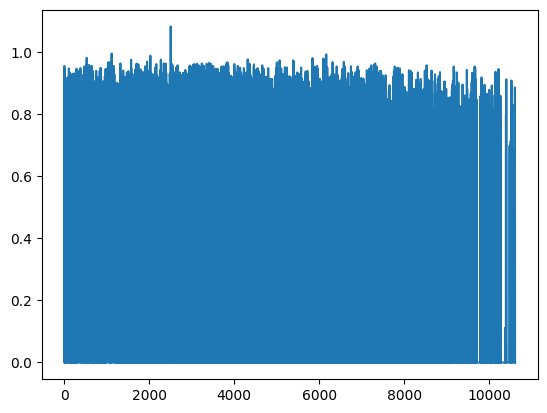

In [92]:
# Plotting the values of the unsorted out-degree weights dictionary
_ = plt.plot(out_degree_weights.values())


This is not a particularly good visualization as it does not show clear trend and we cannot see that the freqency is in fact 0 for many nodes.

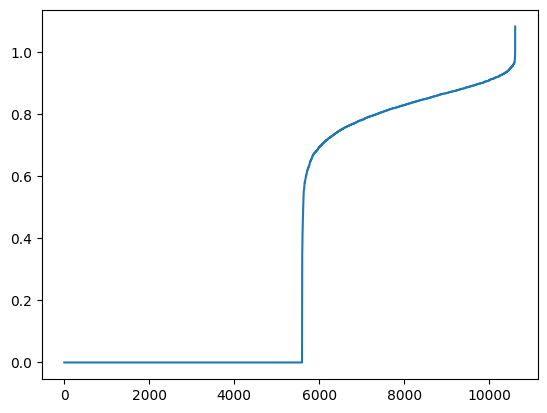

In [93]:
# This code plots the sorted values of the out_degree_weights dictionary using the plot function from the plt module.
plt.plot(sorted(out_degree_weights.values()))

This is a better visualization as we can see more than half of the outgoing weights are 0, and the is a sudden increase of a out_strength of wights around index 5500 and increase slowly afterwards.

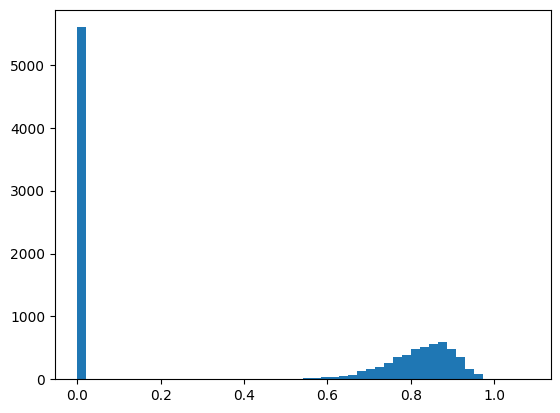

In [94]:
# Plot of histogram of out-degree weights
_ = plt.hist(out_degree_weights.values(), bins=50)

A histogram with 50 bins allows us to see the trend with no gap. There is a spike at the zero degree and a curve roughly between 0.6 and 1.0 for the rest of the histogram.

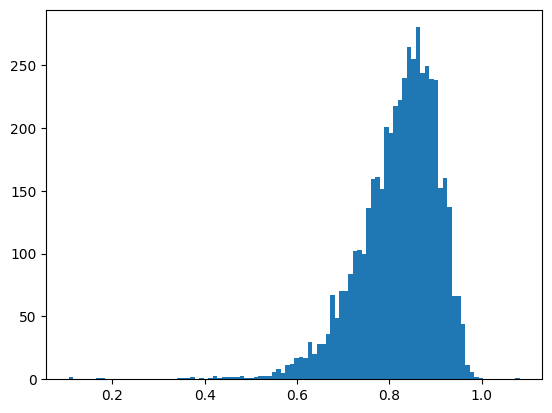

In [95]:
# plot the histogram of the out-degree weights with 0 removed for better visualization, and using 100 bins

_ = plt.hist([ v for v in out_degree.values() if v != 0], bins=100)

This is a histogram without nodes with zero nodes, allowing us to better zoom in. The bins number is increased to 100 to show clearer trend. The curve is realtively smooth and this part of the distribution is left-skewed.

In [96]:
import statistics

# Convert the values of the out_degree_weights dictionary to a list
out_degree_weights_list = list(out_degree_weights.values())

# Calculate mean
mean = statistics.mean(out_degree_weights_list)

# Calculate median
median = statistics.median(out_degree_weights_list)

# Calculate mode
mode = statistics.mode(out_degree_weights_list)

# Calculate standard deviation
std_dev = statistics.stdev(out_degree_weights_list)

# Calculate variance
variance = statistics.variance(out_degree_weights_list)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")


Mean: 0.3872777882441598
Median: 0.0
Mode: 0
Standard Deviation: 0.41342703322869856
Variance: 0.17092191180428343


We can see here due to the 0-out degree nodes, mean, median, and mode cannot describe the distribution vary well, and variancane and std are also too large because of 0-out degree nodes.

2. Write a script to create a network of a ring of N nodes, with first and second neighbors connected.

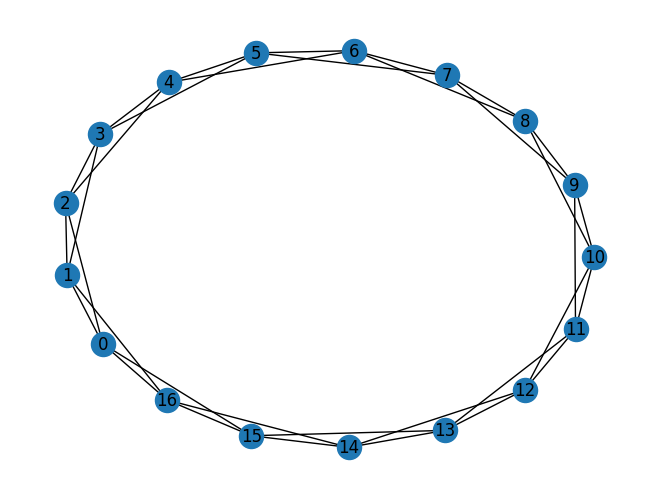

In [97]:
g = networkx.Graph()
n = 17 # Number of nodes, could be any number

for i in range(n): # Use numers 0 to n-1 as the nodes to make indexing easier
    g.add_node(i)

# Add edges between each node and its first and second neighbors
for i in range(n):
    g.add_edge(i, (i+1)%n) # Connect to the first neighbor
    g.add_edge(i, (i+2)%n) # Connect to the second neighbor

networkx.draw(g, with_labels=True)